In [1]:
import os
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from PIL import Image

In [2]:
Epochs = 100
Lr_Rate = 1e-3
Batch_Size = 128

### Make sure to resize the pixels array based upon the number of input images. here It is  given as 309 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
with open("numpy_data.npy","rb") as f:
    pixels = np.load(f)
    
pixels = np.resize(pixels,(309,1,128 ,128))

dataset = torch.from_numpy(pixels)

train_loader = DataLoader(dataset, batch_size=Batch_Size, shuffle=True)

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        #Encoder  16384
        self.enc1 = nn.Linear(in_features=16384, out_features=784) # Input image (128*128 = 16384)
        self.enc2 = nn.Linear(in_features=784, out_features=256) 
        self.enc3 = nn.Linear(in_features=256, out_features=128)
        self.enc4 = nn.Linear(in_features=128, out_features=64)
        self.enc5 = nn.Linear(in_features=64, out_features=32)
        self.enc6 = nn.Linear(in_features=32, out_features=16)

        #Decoder 
        self.dec1 = nn.Linear(in_features=16, out_features=32)
        self.dec2 = nn.Linear(in_features=32, out_features=64)
        self.dec3 = nn.Linear(in_features=64, out_features=128)
        self.dec4 = nn.Linear(in_features=128, out_features=256)
        self.dec5 = nn.Linear(in_features=256, out_features=784)
        self.dec6 = nn.Linear(in_features=784, out_features=16384) # Output image (128*128 = 16384)

    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))
        x = F.relu(self.enc5(x))
        x = F.relu(self.enc6(x))

        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        x = F.relu(self.dec6(x))

        return x

In [5]:

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

def make_dir():
    image_dir = 'Out_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
        
def save_decod_img(img, epoch):
    img = img.view(img.size(0), 1, 128, 128)
    save_image(img, './Out_Images/Autoencoder_image{}.png'.format(epoch))
    
def training(model, train_loader, Epochs):
    train_loss = []
    for epoch in range(Epochs):
        running_loss = 0.0
        for data in train_loader:
            img = data
            img = img.to(device)
            img = img.view(img.size(0), -1)
            optimizer.zero_grad()
            outputs = model(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        loss = running_loss / len(train_loader)
        train_loss.append(loss)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, Epochs, loss))

        if epoch % 5 == 0:
            save_decod_img(outputs.cpu().data, epoch)

    return train_loss
        


In [6]:
device = get_device()

make_dir()
model = Autoencoder().to(device)
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=Lr_Rate)


Autoencoder(
  (enc1): Linear(in_features=16384, out_features=784, bias=True)
  (enc2): Linear(in_features=784, out_features=256, bias=True)
  (enc3): Linear(in_features=256, out_features=128, bias=True)
  (enc4): Linear(in_features=128, out_features=64, bias=True)
  (enc5): Linear(in_features=64, out_features=32, bias=True)
  (enc6): Linear(in_features=32, out_features=16, bias=True)
  (dec1): Linear(in_features=16, out_features=32, bias=True)
  (dec2): Linear(in_features=32, out_features=64, bias=True)
  (dec3): Linear(in_features=64, out_features=128, bias=True)
  (dec4): Linear(in_features=128, out_features=256, bias=True)
  (dec5): Linear(in_features=256, out_features=784, bias=True)
  (dec6): Linear(in_features=784, out_features=16384, bias=True)
)


In [7]:
train_loss = training(model, train_loader, Epochs)

Epoch 1 of 100, Train Loss: 0.011
Epoch 2 of 100, Train Loss: 0.011
Epoch 3 of 100, Train Loss: 0.011
Epoch 4 of 100, Train Loss: 0.011
Epoch 5 of 100, Train Loss: 0.011
Epoch 6 of 100, Train Loss: 0.011
Epoch 7 of 100, Train Loss: 0.011
Epoch 8 of 100, Train Loss: 0.011
Epoch 9 of 100, Train Loss: 0.011
Epoch 10 of 100, Train Loss: 0.011
Epoch 11 of 100, Train Loss: 0.011
Epoch 12 of 100, Train Loss: 0.010
Epoch 13 of 100, Train Loss: 0.011
Epoch 14 of 100, Train Loss: 0.011
Epoch 15 of 100, Train Loss: 0.011
Epoch 16 of 100, Train Loss: 0.011
Epoch 17 of 100, Train Loss: 0.011
Epoch 18 of 100, Train Loss: 0.011
Epoch 19 of 100, Train Loss: 0.011
Epoch 20 of 100, Train Loss: 0.011
Epoch 21 of 100, Train Loss: 0.011
Epoch 22 of 100, Train Loss: 0.011
Epoch 23 of 100, Train Loss: 0.011
Epoch 24 of 100, Train Loss: 0.011
Epoch 25 of 100, Train Loss: 0.011
Epoch 26 of 100, Train Loss: 0.011
Epoch 27 of 100, Train Loss: 0.011
Epoch 28 of 100, Train Loss: 0.011
Epoch 29 of 100, Train Loss: 

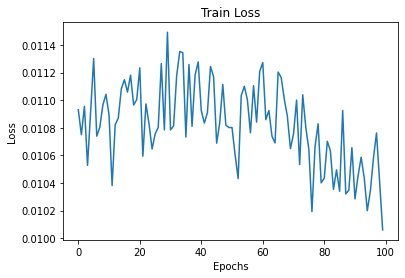

In [8]:
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('deep_ae_mnist_loss.png')


### Some of the generated images can be given here to create the reconstruction and based on that MSE can be calculated to check the novelty of our method

In [12]:
image = pixels[0]
img = img.to(device)
img = img.view(img.size(0), -1)
decoded = model(img)
errors = []

# compute the mean squared error between the fake image
# and the reconstructed image, then add it to our list of errors
mse = np.mean((img - decoded) ** 2)
errors.append(mse)

TypeError: mean() received an invalid combination of arguments - got (out=NoneType, axis=NoneType, dtype=NoneType, ), but expected one of:
 * (*, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)


In [14]:
decoded.shape 

torch.Size([53, 16384])

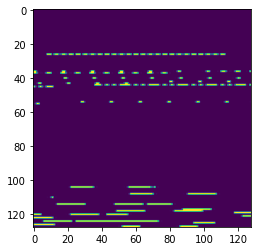

In [20]:
for data in train_loader:
    img = data 
    img = img.to(device)
    
plt.imshow(img[2][0].cpu())

In [13]:
import sys

from scipy.linalg import norm
from scipy import sum, average

In [51]:
def compare_images(img1, img2):
    # normalize to compensate for exposure difference, this may be unnecessary
    # consider disabling it
    img1 = normalize(img1)
    img2 = normalize(img2)
    # calculate the difference and its norms
    diff = img1 - img2  # elementwise for scipy arrays
    
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    return (m_norm, z_norm)

In [52]:
def to_grayscale(arr):
    "If arr is a color image (3D array), convert it to grayscale (2D array)."
    if len(arr.shape) == 3:
        return average(arr, -1)  # average over the last axis (color channels)
    else:
        return arr

In [53]:
def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng

In [54]:
def m():
    file1, file2 = sys.argv[1:1+2]
    # read images as 2D arrays (convert to grayscale for simplicity)
    img1 = to_grayscale(img[3].detach().cpu())
    img2 = to_grayscale(img[2].detach().cpu())
    # compare
    n_m, n_0 = compare_images(img1, img2)
    print("Manhattan norm:", n_m, "/ per pixel:", n_m/img1.size)
    print("Zero norm:", n_0, "/ per pixel:", n_0*1.0/img1.size)

In [55]:
m()

Manhattan norm: 3356.0337 / per pixel: 26.219013214111328
Zero norm: 37.0 / per pixel: 0.2890625


/home/shyma/virtual_envs/pytorch/lib64/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.average is deprecated and will be removed in SciPy 2.0.0, use numpy.average instead
  after removing the cwd from sys.path.
/home/shyma/virtual_envs/pytorch/lib64/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  if __name__ == '__main__':


In [42]:
compare_images(img[3].detach().cpu(),img[2].detach().cpu())

/home/shyma/virtual_envs/pytorch/lib64/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  if __name__ == '__main__':


(201358.0, 1156.0)